In [1]:
# Run this cell to set up packages for lecture.

from lec15_part_1_imports import *

# Lecture 15, Part 1 –  Permutation Testing

## DSC 10, Spring 2025

### Agenda

- Permutation testing.
    - Are the distributions of weight for babies 👶 born to smoking mothers vs. non-smoking mothers different?
    - Are the distributions of pressure drops for footballs 🏈 from two different teams different?

## Review: Hypothesis Testing

From the Brennan Center for Justice:
> Every 10 years, states redraw their legislative and congressional district lines following the census. Because communities change, redistricting is critical to our democracy: maps must be redrawn to ensure that districts are equally populated, comply with laws such as the Voting Rights Act, and are otherwise representative of a state’s population. Done right, redistricting is a chance to create maps that, in the words of John Adams, are an “exact portrait, a miniature” of the people as a whole.

A **partisan gerrymander** seeks to arrange electoral districts in such a way to benefit the political party in control of drawing the map (e.g. in a state where Republican voters outnumber Democrats 55% to 45%, a map drawn to yield a legislature that is 65% Republican and 35% Democrat, is likely the result of partisan gerrymandering.)

One simple test used in practice: the difference between the statewide vote share of a party and the proportion of seats they won. 

Let's use the 2012 House of Representatives Elections in Pennsylvania as an example. 
Democrats and Republicans each had ~50% of the vote share. Democrats won 5 seats and Republicans won 13. 



Null hypothesis: ????

Alternative hypothesis: ????

Test statistic ??

In [2]:
# One experiment


array([9, 9])

In [7]:
# simulate many experiments


(array([  45.,  116., 1026., 1192., 3544., 1644., 1949.,  319.,  159.,
           6.]),
 array([ 2. ,  3.5,  5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. ]),
 <BarContainer object of 10 artists>)

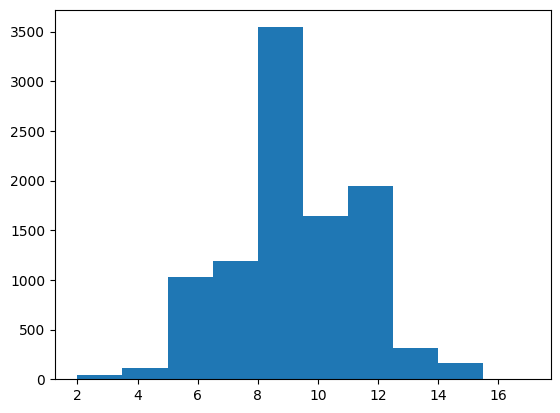

In [6]:
# visualize
plt.hist(results, bins=10)

In [10]:
# p-value


0.0455

## Permutation testing

### Setting

- Standard hypothesis testing answers questions of the form:

> I have a population distribution, and I have **one sample**. Does this sample look like it was drawn from the population?

- Permutation testing answers questions of the form:

> I have **two samples**, but no information about any population distributions. Do these samples look like they were drawn from the same population?

- Standard hypothesis involves a known population distribution, but permutation testing involves an **unknown population distribution**. How do you determine whether two samples came from the same population distribution, if you don't know what that population distribution is?

## Example: Smoking and birth weight 👶

### Smoking and birth weight

- **Question:** Is there a significant difference in the weights of babies born to mothers who smoked vs. babies born to mothers who didn't smoke?

- To approach this question, we'll look at data from a research study.
    - Each row corresponds to a baby.
    - There are two groups of babies: those whose mothers smoked ("smokers' babies"), and those whose mothers didn't smoke ("non-smokers' babies").

In [ ]:
babies = bpd.read_csv('data/baby.csv').get(['Maternal Smoker', 'Birth Weight'])
babies

Note: The `'Birth Weight'` column is measured in ounces; 100 ounces = 6.25 pounds.

### Visualizing the distribution of each group

In [ ]:
smokers = babies[babies.get('Maternal Smoker')]
non_smokers = babies[babies.get('Maternal Smoker') == False]

In [ ]:
fig, ax = plt.subplots()
baby_bins = np.arange(50, 200, 5)
non_smokers.plot(kind='hist', density=True, ax=ax, alpha=0.75, bins=baby_bins, ec='w', figsize=(10, 5))
smokers.plot(kind='hist', density=True, ax=ax, alpha=0.75, bins=baby_bins, ec='w')
plt.legend(['Maternal Smoker = False', 'Maternal Smoker = True'])
plt.xlabel('Birth Weight');

In [ ]:
babies.groupby('Maternal Smoker').mean()

In [ ]:
diff_in_means = (babies.groupby('Maternal Smoker').mean().get('Birth Weight').loc[False] - 
                 babies.groupby('Maternal Smoker').mean().get('Birth Weight').loc[True])
diff_in_means

- **Question:** Is there a significant difference in the weights of babies born to mothers who smoked vs. babies born to mothers who didn't smoke?

### Setup for the hypothesis test

- **Null Hypothesis**: In the population, birth weights of smokers' babies and non-smokers' babies have the same distribution, and the observed differences in our samples are due to random chance.



- **Alternative Hypothesis**: In the population, smokers' babies have lower birth weights than non-smokers' babies, on average. The observed differences in our samples cannot be explained by random chance alone.

- **Test statistic**: Difference in mean birth weight of non-smokers' babies and smokers' babies.


$$\substack{\text{mean birth weight of} \\ \text{non-smokers' babies}} \hspace{0.5in} - \hspace{0.5in} \substack{\text{mean birth weight of} \\ \text{smokers' babies}}$$

### Discussion Question

We recently introduced the total variation distance (TVD) as a test statistic. Why **can't** we use the TVD as our test statistic in this hypothesis test?

### Generating new samples under the null hypothesis

- We need the **distribution of the test statistic under the assumption the null hypothesis is true**.

- Under the null hypothesis, both groups are sampled from the same population distribution.

- We need to draw two samples from that population distribution (of the same sizes as our original smoking and non-smoking groups) and compute the difference in group means for our two samples. 

- 🚨 **Issue**: We don't have the population distribution, so we can't draw samples from it!

### Constructing a population

- **Idea**: We can construct a "population" by combining both of our samples. Then, to create two random samples from it, we just separate (or split) the population into two random groups.

- We can do this because, under the null hypothesis, the mother's smoking status has no impact on the baby's birth weight, so all baby weights come from the same population.

In [ ]:
show_permutation_testing_intro()

### Permutations

- A **permutation** of a sequence is a rearrangement of the elements in that sequence.
    - For example, `'BAC'` and `'CAB'` are both permutations of the string `'ABC'`.
    - We create permutations by **shuffling**.

- In the previous animation, we repeatedly split the "population" into two random groups whose sizes were equal to the original samples' sizes.
    - In the original non-smokers' sample, there were 7 weights, and in the original smokers' sample, there were 4 weights.
    - Each time we created a pair of new samples, we randomly chose 7 weights to be part of the _new_ non-smokers' sample, and the other 4 weights to be part of the _new_ smokers' sample.

- **Key idea:** To randomly assign weights to groups, in a way that preserves the sizes of the groups, we can just shuffle the `'Maternal Smoker'` column of `babies`!

### Permutation tests

A permutation test is a type of A/B test (and a type of hypothesis test). It tests whether two samples come from the same population distribution. To conduct a permutation test:

1. Shuffle the group labels (i.e. the `True`s and `False`s) to generate two new samples under the null. These two new samples have the same sizes as the original samples.

2. Compute the difference in group means (the test statistic).

3. Repeat steps 1 and 2 to generate an **empirical distribution of the difference in group means**.

4. See where the observed statistic lies in the empirical distribution. If, in our simulations, we rarely saw a difference in group means as extreme as the observed difference in group means, we have evidence to reject the null.

### Permutation tests with DataFrames

- We want to randomly shuffle just the `'Maternal Smoker'` column in the `babies` DataFrame.

- `df.sample` returns a random sample of the rows in a DataFrame, but we want to shuffle one column independently.

In [ ]:
data = bpd.DataFrame().assign(x=['a', 'b', 'c', 'd', 'e'], y=[1, 2, 3, 4, 5])
data

In [ ]:
# The order of the rows are different,
# but each x is still in a row with the same y.
# This is NOT what we want.
data.sample(data.shape[0])

- **Solution:** Use `np.random.permutation`, which takes in a sequence and returns a shuffled version of it, as an array.

In [ ]:
# Random!
np.random.permutation(data.get('x'))

In [ ]:
data.assign(shuffled_x=np.random.permutation(data.get('x')))

### Shuffling one column

As mentioned before, we'll shuffle the `'Maternal Smoker'` column.

In [ ]:
babies_with_shuffled = babies.assign(
    Shuffled_Labels=np.random.permutation(babies.get('Maternal Smoker'))
)
babies_with_shuffled

Let's look at the distributions of the two new samples we just generated.

In [ ]:
fig, ax = plt.subplots()
baby_bins = np.arange(50, 200, 5)
smokers = babies_with_shuffled[babies_with_shuffled.get('Shuffled_Labels')]
non_smokers = babies_with_shuffled[babies_with_shuffled.get('Shuffled_Labels') == False]
non_smokers.plot(kind='hist', y='Birth Weight', density=True, ax=ax, alpha=0.75, bins=baby_bins, ec='w', figsize=(10, 5))
smokers.plot(kind='hist',y='Birth Weight', density=True, ax=ax, alpha=0.75, bins=baby_bins)
plt.legend(['Maternal Smoker = False', 'Maternal Smoker = True'])
plt.xlabel('Birth Weight');

What do you notice? 👀

### How close are the means of the shuffled groups?

In [ ]:
babies_with_shuffled.groupby('Shuffled_Labels').mean().get(['Birth Weight'])

In [ ]:
group_means = babies_with_shuffled.groupby('Shuffled_Labels').mean().get('Birth Weight')
group_means.loc[False] - group_means.loc[True]

This is the test statistic for one experiment (one "shuffle"). Let's write a function that can compute this test statistic for any shuffle.

In [ ]:
def difference_in_group_means(weights_df):
    group_means = weights_df.groupby('Shuffled_Labels').mean().get('Birth Weight')
    return group_means.loc[False] - group_means.loc[True]

difference_in_group_means(babies_with_shuffled)

### Simulation

- This was just one random shuffle.

- How likely is it that a random shuffle results in a 9.26+ ounce difference in means?

- We have to repeat the shuffling a bunch of times. On each iteration:
    1. Shuffle the labels to create two new samples.
    2. Add them as a column to the DataFrame.
    3. Compute the difference in group means in the two new samples and store the result.

### Running the simulation

In [ ]:
n_repetitions = 500 # The dataset is large, so it takes too long to run if we use 5000 or 10000
differences = np.array([])

for i in np.arange(n_repetitions):
    # Step 1: Shuffle the labels to create two new samples.
    shuffled_labels = np.random.permutation(babies.get('Maternal Smoker'))
    
    # Step 2: Add them as a column to the DataFrame.
    shuffled = babies_with_shuffled.assign(Shuffled_Labels=shuffled_labels)
    
    # Step 3: Compute the difference in group means in the two new samples and store the result.
    difference = difference_in_group_means(shuffled)
    
    differences = np.append(differences, difference)
    
differences

In [ ]:
(bpd.DataFrame()
 .assign(simulated_diffs=differences)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);

- Note that the empirical distribution of the test statistic (difference in means) is centered around 0.
- This matches our intuition – if the null hypothesis is true, there should be no difference in the group means on average.

### Conclusion of the test

Where does our observed statistic lie?

In [ ]:
(bpd.DataFrame()
 .assign(simulated_diffs=differences)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(diff_in_means, color='black', linewidth=4, label='observed difference in means')
plt.legend();

In [ ]:
smoker_p_value = np.count_nonzero(differences >= diff_in_means) / n_repetitions
smoker_p_value

### Conclusion

- Under the null hypothesis, we rarely see differences as large as 9.26 ounces.

- Therefore, we reject the null hypothesis: the evidence implies that the groups do not come from the same distribution.

- Still, we can't conclude that smoking *causes* lower birth weight because there may be other factors at play. For instance, maybe smokers are more likely to drink caffeine, and caffeine causes lower birth weight.


In [ ]:
show_permutation_testing_summary()

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com)

Recall, `babies` has two columns.

In [ ]:
babies.take(np.arange(3))

To randomly assign weights to groups, we shuffled `'Maternal Smoker'` column. Could we have shuffled the `'Birth Weight'` column instead?

- A. Yes
- B. No

<br>

<details>
    <summary>✅ Click <b>here</b> to see the answer to the previous question <b>after</b> you've submitted an answer to it.</summary>
    
<b>Yes</b>, we could have. It doesn’t matter which column we shuffle – we could shuffle one or the other, or even both, as long as we shuffle each separately. 
    
Think about it like this – pretend you bring a gift 🎁 to a Christmas party 🎄 for a gift exchange, where everyone must leave the party with a random person’s gift. Pretend everyone stands around a circular table and puts the gift they bought in front of them. To randomly assign people to gifts, you could shuffle the gifts on the table and have all the people stay in the same spot, or you could have the people physically shuffle and keep the gifts in the same spots, or you could do both – either way, everyone will end up with a random gift!
    
</details>

## Example: Did the New England Patriots cheat? 🏈📌

### Deflategate

<center><img width="40%" src="./images/deflate.jpg"></center>

- On January 18, 2015, the New England Patriots played the Indianapolis Colts for a spot in the Super Bowl.
- The Patriots won, 45-7. They went on to win the Super Bowl.
- After the game, **it was alleged that the Patriots intentionally deflated footballs**, making them easier to catch. This scandal was called "Deflategate."

### Background

- Each team brings 12 footballs to the game. Teams use their own footballs while on offense.

- NFL rules stipulate that **each ball must be inflated to between 12.5 and 13.5 pounds per square inch (psi)**.

- Before the game, officials found that all of the Patriots' footballs were at about 12.5 psi, and that all of the Colts' footballs were at about 13.0 psi.
    - This pre-game data was not written down.

- In the second quarter, the Colts intercepted a Patriots ball and notified officials that it felt under-inflated.

- At halftime, two officials (Clete Blakeman and Dyrol Prioleau) independently measured the pressures of as many of the 24 footballs as they could.
    - They ran out of time before they could finish.

- Note that the relevant quantity is the **change in pressure** from the start of the game to the halftime.
    - The Patriots' balls *started* at a lower psi (which is not an issue on its own).
    - The allegations were that the Patriots **deflated** their balls, during the game.

### The measurements

In [ ]:
footballs = bpd.read_csv('data/footballs.csv')
footballs

- There are only 14 rows (10 for Patriots footballs, 4 for Colts footballs) since the officials weren't able to record the pressures of every ball.
- The `'Pressure'` column records the average of the two officials' measurements at halftime.
- The `'PressureDrop'` column records the difference between the estimated starting pressure and the average recorded `'Pressure'` of each football.

### The question

Did the Patriots' footballs drop in pressure more than the Colts'?

- We want to test whether two samples came from the same distribution – this calls for a permutation test.

- **Null Hypothesis**: The drops in pressures for both teams came from the same distribution.
    - By chance, the Patriots' footballs deflated more.
- **Alternative Hypothesis**: No, the Patriots' footballs deflated more than one would expect due to random chance alone.

### The test statistic

Similar to the baby weights example, our test statistic will be the difference between the teams' average pressure drops. We'll calculate the mean drop for the `'Patriots'` minus the mean drop for the `'Colts'`.

In [ ]:
means = footballs.groupby('Team').mean().get('PressureDrop')
means

In [ ]:
# Calculate the observed statistic.
observed_difference = means.loc['Patriots'] - means.loc['Colts']
observed_difference

The average pressure drop for the Patriots was about 0.74 psi more than the Colts.

### Creating random groups and calculating one value of the test statistic

We'll run a permutation test to see if 0.74 psi is a significant difference.
- To do this, we'll need to repeatedly shuffle either the `'Team'` or the `'PressureDrop'` column.
- We'll shuffle the `'PressureDrop'` column.
- Tip: It's a good idea to simulate one value of the test statistic before putting everything in a `for`-loop.

In [ ]:
# For simplicity, keep only the columns that are necessary for the test: 
# one column of group labels and one column of numerical values.
footballs = footballs.get(['Team', 'PressureDrop'])
footballs

In [ ]:
# Shuffle one column. 
# We chose to shuffle the numerical data (pressure drops), but we could have shuffled the group labels (team names) instead.
shuffled_drops = np.random.permutation(footballs.get('PressureDrop'))
shuffled_drops

In [ ]:
# Add the shuffled column back to the DataFrame.
shuffled = footballs.assign(Shuffled_Drops=shuffled_drops)
shuffled

In [ ]:
# Calculate the group means for the two randomly created groups.
team_means = shuffled.groupby('Team').mean().get('Shuffled_Drops')
team_means

In [ ]:
# Calcuate the difference in group means (Patriots minus Colts) for the randomly created groups.
team_means.loc['Patriots'] - team_means.loc['Colts']

### The simulation

- Repeat the process many times by wrapping it inside a `for`-loop.
- Keep track of the difference in group means in an array, appending each time.
- Optionally, create a function to calculate the difference in group means.

In [ ]:
def difference_in_mean_pressure_drops(pressures_df):
    team_means = pressures_df.groupby('Team').mean().get('Shuffled_Drops')
    return team_means.loc['Patriots'] - team_means.loc['Colts']

In [ ]:
n_repetitions = 5000 # The dataset is much smaller than in the baby weights example, so a larger number of repetitions will still run quickly.

differences = np.array([])
for i in np.arange(n_repetitions):
    # Step 1: Shuffle the pressure drops.
    shuffled_drops = np.random.permutation(footballs.get('PressureDrop'))
    
    # Step 2: Put them in a DataFrame.
    shuffled = footballs.assign(Shuffled_Drops=shuffled_drops)
    
    # Step 3: Compute the difference in group means and add the result to the differences array.
    difference = difference_in_mean_pressure_drops(shuffled)

    differences = np.append(differences, difference)
    
differences

### Conclusion

In [ ]:
bpd.DataFrame().assign(SimulatedDifferenceInMeans=differences).plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
plt.axvline(observed_difference, color='black', linewidth=4, label='observed difference in means')
plt.legend();

It doesn't look good for the Patriots. What is the p-value?
- Recall, the p-value is the probability, under the null hypothesis, of seeing a result **as or more extreme** than the observation.
- In this case, that's the probability of the difference in mean pressure drops being greater than or equal to 0.74 psi.

In [ ]:
np.count_nonzero(differences >= observed_difference) / n_repetitions

This p-value is low enough to consider this result to be _highly_ statistically significant ($p<0.01$).

### 🚨 Caution!

- We reject the null hypothesis, as it is unlikely that the difference in mean pressure drops is due to chance alone.
- But this doesn't establish **causation**.
- That is, we can't conclude that the Patriots **intentionally** deflated their footballs.

### Aftermath

Quote from an investigative report commissioned by the NFL:

> “[T]he average pressure drop of the Patriots game balls exceeded the average pressure drop of the Colts balls by 0.45 to 1.02 psi, depending on various possible assumptions regarding the gauges used, and assuming an initial pressure of 12.5 psi for the Patriots balls and 13.0 for the Colts balls.”

- Many different methods were used to determine whether the drop in pressures were due to chance, including physics. 
    - We computed an observed difference of 0.74, which is in line with the findings of the report. 
- In the end, Tom Brady (quarterback for the Patriots at the time) was suspended 4 games and the team was fined $1 million dollars.
- The [Deflategate Wikipedia article](https://en.wikipedia.org/wiki/Deflategate) is extremely thorough; give it a read if you're curious!

## Summary, next time

### Summary

- Permutation tests help us determine if **two samples** came from the same population. We can answers questions like:
    - "Do smokers' babies and non-smokers babies' weigh the same?"
    - More generally: are these things like those things?
- Permutation testing strategy:
   - Create a "population" by pooling data from both samples together.
   - Randomly divide this "population" into two groups of the same sizes as the original samples. 
   - Repeat this process, calculating the test statistic for each pair of random groups.
   - Generate an empirical distribution of test statistics and see whether the observed statistic is consistent with it.
- Implementation:
    - To randomly divide the "population" into two groups of the same sizes as the original samples, we'll just shuffle the group labels and use the shuffled group labels to define the two random groups.

### A/B testing

- Permutation tests are one way to perform A/B tests.
- These are both also hypothesis tests.
- An A/B test aims to determine if two samples are from the same population (the name comes from giving names to the samples – sample A and sample B).
- We implemented A/B tests by using permutations. Butside of this class, permutation tests can be used for other purposes, and A/B tests can be done without permutations.
- **For us, they mean the same thing, so if you see A/B test anywhere in the class, it refers to a permutation test.**